In [29]:
import pandas as pd
import json
import re
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models
import pymorphy2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path='data/life_news_preproc.json'

In [3]:
news = []
with open(data_path) as file:
    for line in file:
        news.append(json.loads(line))
data = pd.DataFrame(news)
data.head()

,link,title,category,tags,text
0,https://life.ru/p/1471948,"Стало известно, кто захоронен в безымянных сар...",tehnologii,"[Новости, захоронения, кремль, Интересное, Нау...",учёный провести исследование выяснить захорони...
1,https://life.ru/p/1471901,"Google пообещал ""воскресить"" старые компьютеры...",tehnologii,"[Новости, google, Сервисы и приложения, Наука ...",google анонсировать новый версия фирменный chr...
2,https://life.ru/p/1471856,Минцифры опровергло сообщения о планах ввести ...,tehnologii,"[Новости, Минцифры, Экономика, Наука и Техноло...",министерство цифровой развитие связь массовый ...
3,https://life.ru/p/1471819,TikTok приступил к созданию представительства ...,tehnologii,"[Новости, tiktok, Социальные сети и мессенджер...",tiktok приступить создание представительство р...
4,https://life.ru/p/1471813,В России могут ввести налог для Steam и PlaySt...,tehnologii,"[Новости, playstationstore, steam, Наука и Тех...",россия цель поддержка отечественный видеоигра ...


In [4]:
data.category.unique()

array(['tehnologii', 'proisshestviya', 'sport', 'politika'], dtype=object)

# Preprocessing 

In [10]:
import re
import json
import string
import pymorphy2
import pandas as pd
from pymystem3 import Mystem

In [6]:
for i, row in data.iterrows():
    data.at[i,'text'] = row['text'].lower()

In [7]:
for i, row in data.iterrows():
    line = row['text']
    data.at[i, 'text'] = line.strip('\n').strip()

In [10]:
morph = pymorphy2.MorphAnalyzer()
bad_tags = ['NPRO', 'PRED', 'PREP', 'CONJ', 'PRCL', 'INTJ']

C:\Users\Voron\.conda\envs\text_dataset\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
C:\Users\Voron\.conda\envs\text_dataset\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
C:\Users\Voron\.conda\envs\text_dataset\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
C:\Users\Voron\.conda\envs\text_dataset\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.sign

вот тут удалила стоп-слова

In [11]:
for i, row in data.iterrows():
    line = row['text'].split()
    words_to_delete = set()
    for word in line:
        p = morph.parse(word)[0].tag
        if p.POS in bad_tags:
            words_to_delete.add(word)
    for word in words_to_delete:
        line = list(filter(lambda a: a != word, line))
    data.at[i, 'text'] = ' '.join(line)
    if i % 1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000


In [12]:
for i, row in data.iterrows():
    with open('final_changed_data.json','a') as file:
                file.write(json.dumps({
                    'link' : row['link'],
                    'category': row['category'],
                    'title': row['title'],
                    'text': row['text'],
                    'tags': row['tags']
                },ensure_ascii=True) + '\n')

In [13]:
news = []
with open('final_changed_data.json') as file:
    for line in file:
        news.append(json.loads(line))
data = pd.DataFrame(news)
data.head()

,link,category,title,text,tags
0,https://life.ru/p/1471948,tehnologii,"Стало известно, кто захоронен в безымянных сар...",учёный провести исследование выяснить захорони...,"[Новости, захоронения, кремль, Интересное, Нау..."
1,https://life.ru/p/1471901,tehnologii,"Google пообещал ""воскресить"" старые компьютеры...",google анонсировать новый версия фирменный chr...,"[Новости, google, Сервисы и приложения, Наука ..."
2,https://life.ru/p/1471856,tehnologii,Минцифры опровергло сообщения о планах ввести ...,министерство цифровой развитие связь массовый ...,"[Новости, Минцифры, Экономика, Наука и Техноло..."
3,https://life.ru/p/1471819,tehnologii,TikTok приступил к созданию представительства ...,tiktok приступить создание представительство р...,"[Новости, tiktok, Социальные сети и мессенджер..."
4,https://life.ru/p/1471813,tehnologii,В России могут ввести налог для Steam и PlaySt...,россия цель поддержка отечественный видеоигра ...,"[Новости, playstationstore, steam, Наука и Тех..."


In [15]:
corpus=list(data.text)
corpus[0]

'учёный провести исследование выяснить захоронить безымянный саркофаг вознесенский собор московский кремль сообщать вечерний москва генетика южный федеральный университет вместе коллега музеязаповедник московский кремль южный научный центр ран провести идентификация некрополь вознесенский собор несколько подвергаться серьёзный разрушение результат некоторый саркофаг оказаться безымянный узнать захоронить столичный кремль помочь специалист южный федеральный университет днкэкспертиза направить образец костный материал безымянный саркофаг принадлежащий великий княгиня супруг князь иван iii софья палеолог историк предполагать захоронение эпитафия мочь принадлежать дочь внучка палеолог евдокия иванович анастасия петрович учёный научный лаборатория юфу сначала выяснить захоронить безымянный саркофаг вероятность иметь родство великий княгиня тип мать – дочь обнаружить вероятность скелет принадлежать материнский линия результат исследование подтвердить версия историк захоронение находиться доч

In [16]:
texts = [[text for text in doc.split()] for doc in corpus]

In [17]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LSI

In [18]:
# Set training parameters.
chunksize = 2000
onepass=True
num_topic=4

Модель с 4 топиками

In [19]:
%%time
lsimodel4 = LsiModel(corpus=corpus, num_topics=num_topic, id2word=dictionary,chunksize=chunksize,onepass=onepass)
lsimodel4.show_topics(num_topics=4)

Wall time: 47 s


[(0,
  '0.334*"который" + 0.320*"год" + 0.281*"россия" + 0.197*"мочь" + 0.164*"свой" + 0.158*"весь" + 0.144*"украина" + 0.139*"страна" + 0.129*"российский" + 0.122*"время"'),
 (1,
  '-0.385*"украина" + -0.381*"россия" + 0.256*"год" + -0.195*"сша" + -0.169*"президент" + 0.163*"который" + -0.161*"нато" + 0.143*"человек" + -0.142*"путин" + -0.138*"страна"'),
 (2,
  '-0.316*"сборная" + -0.306*"матч" + -0.303*"команда" + -0.208*"наш" + -0.171*"чемпионат" + -0.170*"россия" + -0.170*"игра" + 0.140*"человек" + -0.124*"клуб" + -0.114*"олимпиада"'),
 (3,
  '0.358*"год" + 0.319*"ракета" + -0.235*"человек" + 0.144*"российский" + 0.142*"космический" + -0.140*"лайф" + 0.134*"корабль" + -0.131*"ранее" + -0.125*"ребёнок" + 0.115*"военный"')]

с 10 топиками и другими параметрами

In [31]:
%%time
# Set training parameters.
chunksize = 10000
onepass=False
num_topic=10
lsimodel10 = LsiModel(corpus=corpus, num_topics=num_topic, id2word=dictionary,chunksize=chunksize,onepass=onepass)
lsimodel10.show_topics(num_topics=num_topic)  # Showing only the top 5 topics

Wall time: 9.38 s


[(0,
  '0.334*"который" + 0.317*"год" + 0.289*"россия" + 0.195*"мочь" + 0.164*"свой" + 0.156*"весь" + 0.145*"украина" + 0.142*"страна" + 0.132*"российский" + 0.124*"сша"'),
 (1,
  '-0.388*"россия" + -0.369*"украина" + 0.309*"год" + -0.185*"сша" + -0.175*"президент" + 0.163*"который" + -0.153*"страна" + -0.147*"нато" + -0.138*"путин" + -0.138*"рф"'),
 (2,
  '-0.307*"матч" + -0.302*"команда" + -0.295*"сборная" + -0.205*"наш" + -0.193*"россия" + -0.175*"игра" + -0.165*"чемпионат" + 0.146*"человек" + -0.136*"клуб" + 0.111*"который"'),
 (3,
  '0.419*"год" + -0.263*"человек" + 0.209*"ракета" + -0.193*"лайф" + -0.180*"ранее" + -0.147*"ребёнок" + 0.125*"сша" + -0.125*"произойти" + -0.121*"мужчина" + -0.121*"который"'),
 (4,
  '0.626*"год" + -0.321*"мочь" + -0.269*"который" + 0.125*"президент" + -0.118*"устройство" + -0.106*"пользователь" + -0.100*"ракета" + -0.097*"приложение" + -0.093*"смартфон" + 0.093*"ранее"'),
 (5,
  '0.462*"украина" + -0.210*"россия" + -0.207*"ракета" + -0.178*"российски

с 10 топиками и теми же параметрами, что у 1 модели

In [21]:
%%time
# Set training parameters.
chunksize = 2000
onepass=True
num_topic=10
lsimodel10s = LsiModel(corpus=corpus, num_topics=num_topic, id2word=dictionary,chunksize=chunksize,onepass=onepass)
lsimodel10s.show_topics(num_topics=num_topic) 

Wall time: 52.9 s


[(0,
  '0.335*"который" + 0.319*"год" + 0.285*"россия" + 0.195*"мочь" + 0.164*"свой" + 0.155*"весь" + 0.144*"украина" + 0.140*"страна" + 0.132*"российский" + 0.123*"сша"'),
 (1,
  '-0.380*"россия" + -0.374*"украина" + 0.300*"год" + -0.181*"сша" + -0.170*"президент" + 0.155*"который" + -0.150*"нато" + -0.146*"страна" + -0.141*"рф" + -0.137*"путин"'),
 (2,
  '-0.311*"сборная" + -0.307*"матч" + -0.303*"команда" + -0.207*"наш" + -0.182*"россия" + -0.173*"игра" + -0.171*"чемпионат" + 0.125*"человек" + -0.124*"клуб" + -0.112*"олимпиада"'),
 (3,
  '0.361*"год" + -0.274*"человек" + 0.249*"ракета" + -0.176*"лайф" + -0.166*"ребёнок" + -0.159*"ранее" + -0.132*"мужчина" + -0.131*"произойти" + -0.125*"летний" + -0.113*"пострадать"'),
 (4,
  '0.549*"год" + -0.269*"мочь" + -0.204*"устройство" + -0.170*"смартфон" + -0.170*"пользователь" + -0.160*"который" + -0.158*"приложение" + -0.156*"iphone" + -0.132*"новый" + -0.107*"apple"'),
 (5,
  '-0.337*"год" + 0.275*"ракета" + 0.209*"который" + -0.208*"компа

In [32]:
lsitopics4 = [[word for word, prob in topic] for topicid, topic in lsimodel4.show_topics(formatted=False)]
lsitopics10 = [[word for word, prob in topic] for topicid, topic in lsimodel10.show_topics(formatted=False)]
lsitopics10s = [[word for word, prob in topic] for topicid, topic in lsimodel10s.show_topics(formatted=False)]

In [33]:
lsi_coherence4 = CoherenceModel(topics=lsitopics4[:4], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
lsi_coherence10 = CoherenceModel(topics=lsitopics10[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
lsi_coherence10s = CoherenceModel(topics=lsitopics10s[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [34]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

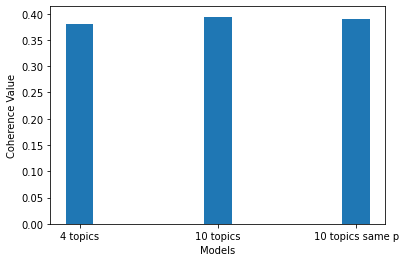

In [35]:
evaluate_bar_graph([lsi_coherence4,lsi_coherence10, lsi_coherence10s],
                   ['4 topics', '10 topics', '10 topics same p'])

по значению метрики можно сделать вывод, что модель с 10 тотиками дает результат лучше, но не намного 

# Пробовала чухну с топиками и word to vec


In [142]:
topicks=[]

In [144]:
for topicid, topic in lsimodel4.show_topics(formatted=False):
    for i in topic:
        topicks.append(i[0])

In [145]:
topicks

['который',
 'год',
 'россия',
 'мочь',
 'свой',
 'весь',
 'украина',
 'страна',
 'российский',
 'сша',
 'россия',
 'украина',
 'год',
 'сша',
 'президент',
 'который',
 'страна',
 'нато',
 'рф',
 'путин',
 'матч',
 'команда',
 'сборная',
 'наш',
 'россия',
 'игра',
 'чемпионат',
 'человек',
 'клуб',
 'который',
 'год',
 'человек',
 'ракета',
 'лайф',
 'ранее',
 'ребёнок',
 'произойти',
 'мужчина',
 'летний',
 'который']

In [37]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel4.show_topics(formatted=False)]

In [38]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [39]:
lsi_coherence

0.4128915699430883

In [117]:
def return_tags(data,category):
    tags=[]
    for i, row in data.iterrows():
        if str(row.category)==category:
            for k in row.tags:
                if k in tags or k=="Новости":
                    continue;
                tags.append(k)
    return tags

In [118]:
politic_tags=return_tags(data,'politika')
tehnologi_tags=return_tags(data,'tehnologii')
proisshestviya_tags=return_tags(data,'proisshestviya')
sport_tags=return_tags(data,'sport')

In [119]:
texts+=politic_tags
texts+=tehnologi_tags
texts+=proisshestviya_tags
texts+=sport_tags

In [120]:
texts+=list(data.category.unique())

In [43]:
model = gensim.models.KeyedVectors.load_word2vec_format('topic/model.bin', binary=True)

In [47]:
from gensim.models import Word2Vec

In [153]:
w2v_model = Word2Vec(
    min_count=10,
    window=2,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)

In [154]:
w2v_model.build_vocab(texts)

In [155]:
w2v_model.train(texts, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)

(15734678, 25989330)

In [157]:
model.most_similar(positive="владимир")

KeyError: "Key 'владимир' not present"